In [ ]:
#Import Required Libraries
!pip install tensorflow matplotlib


In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Choose a Dataset .We’ll use a built-in dataset like CIFAR-10 or MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [ ]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3633 - loss: 1.7178 - val_accuracy: 0.5429 - val_loss: 1.2519
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5711 - loss: 1.2007 - val_accuracy: 0.6173 - val_loss: 1.0709
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6406 - loss: 1.0220 - val_accuracy: 0.6554 - val_loss: 0.9833
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.6753 - loss: 0.9190 - val_accuracy: 0.6481 - val_loss: 0.9966
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7039 - loss: 0.8395 - val_accuracy: 0.6817 - val_loss: 0.9118
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7312 - loss: 0.7733 - val_accuracy: 0.6889 - val_loss: 0.9209
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7482 - loss: 0.7140 - val_accuracy: 0.6938 - val_loss: 0.8988
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7657 -

In [ ]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.7091 - loss: 0.8971

Test accuracy: 0.7091000080108643


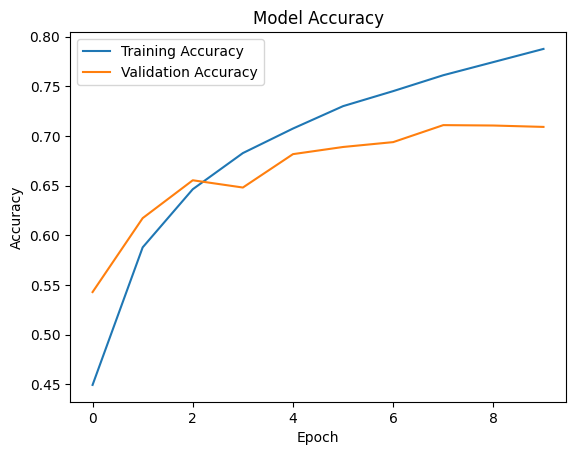

In [ ]:
# Visualize Accuracy and Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


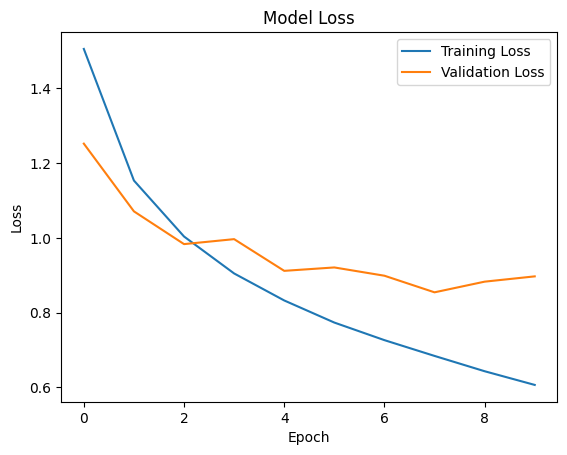

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [ ]:
#make predictions
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print("Predicted label:", predicted_label)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Predicted label: 3
